In [1]:
### data
import pandas as pd
import numpy as np

### APIs
import tweepy

## Plots
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sea
get_ipython().magic('matplotlib inline')

# Sentiment analysis
from textblob import TextBlob
import re, os, json

In [2]:
screen_name = 'cdvel'

with open(os.path.join(os.getcwd(),"data/credentials.json")) as data_file:    
    key = json.load(data_file)

#print key["API_KEY"], key["API_SECRET"], key["ACCESS_TOKEN"], key["ACCESS_TOKEN_SECRET"]

In [3]:
def twitter_setup():
    #authentication
    auth = tweepy.OAuthHandler(key["API_KEY"], key["API_SECRET"])
    auth.set_access_token(key["ACCESS_TOKEN"], key["ACCESS_TOKEN_SECRET"])    
    return tweepy.API(auth)

extractor = twitter_setup()



In [4]:
tweets = [];

for page in xrange(5):
        tweets = tweets + extractor.user_timeline(screen_name=screen_name, count=200, pagination=page+1)

print ("No. tweets collected: {}\n".format(len(tweets)))

No. tweets collected: 1000



In [5]:
for tweet in tweets[:10]:
    print ("\n{}".format(tweet.text.encode('utf-8')))



"Just what we all wanted: super secret, super long meetings that span the entire world" #QuantumComputing 

https://t.co/RrwxRTN1aj

Where does all our training data derive from? Did someone, long ago, sit around a computer labeling fingers?… https://t.co/1ZRKOduxJj

RT @jwangARK: TSMC — the world's largest chip factory — is all about crypto all of a sudden.
Bitmain is buying ~20k 16nm wafers a month. Th…

Google CEO Sundar Pichai says AI is more profound than electricity or fire https://t.co/7uhp2icRse

WhatsApp launches a separate app for small businesses https://t.co/0YQ5ZsxGJo

LG has distributed its AI-based platform, DeepThinQ 1.0 to other products as well https://t.co/ewcI9PUo9D via @reddit

How to tame the tech titans - Competition in the digital age https://t.co/toGDcyS3oh

Microsoft execs say in 20 years we'll all have digital assistants that will be our alter egos — and we need to set https://t.co/UvYjDZ3n9q

Facebook's next news feed tweak: ranking 'trusted' sources https:

In [6]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['length']  = np.array([len(tweet.text) for tweet in tweets])
data['id']   = np.array([tweet.id for tweet in tweets])
data['created'] = np.array([tweet.created_at for tweet in tweets])
data['source'] = np.array([tweet.source for tweet in tweets])
data['no_likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['no_retweets'] = np.array([tweet.retweet_count for tweet in tweets])
data['slug'] = np.array([''.join([tweet.user.screen_name, '/status/', str(tweet.id)])  for tweet in tweets])


#print tweet
display(data.head(10))

,Tweets,length,id,created,source,no_likes,no_retweets,slug
0,"""Just what we all wanted: super secret, super ...",131,955666497862586368,2018-01-23 05:00:23,Buffer,0,0,cdvel/status/955666497862586368
1,Where does all our training data derive from? ...,133,955635334963912704,2018-01-23 02:56:33,dlvr.it,0,0,cdvel/status/955635334963912704
2,RT @jwangARK: TSMC — the world's largest chip ...,140,955485255695298561,2018-01-22 17:00:11,Buffer,0,219,cdvel/status/955485255695298561
3,Google CEO Sundar Pichai says AI is more profo...,98,955451257287831553,2018-01-22 14:45:05,Crowdfire - Go Big,0,0,cdvel/status/955451257287831553
4,WhatsApp launches a separate app for small bus...,77,955448031381475329,2018-01-22 14:32:16,Crowdfire - Go Big,0,0,cdvel/status/955448031381475329
5,"LG has distributed its AI-based platform, Deep...",117,955272971609817088,2018-01-22 02:56:39,dlvr.it,0,0,cdvel/status/955272971609817088
6,How to tame the tech titans - Competition in t...,84,955122950776283136,2018-01-21 17:00:31,Buffer,0,0,cdvel/status/955122950776283136
7,Microsoft execs say in 20 years we'll all have...,138,955091407093542912,2018-01-21 14:55:10,Crowdfire - Go Big,1,0,cdvel/status/955091407093542912
8,Facebook's next news feed tweak: ranking 'trus...,82,955088894281830400,2018-01-21 14:45:11,Crowdfire - Go Big,1,0,cdvel/status/955088894281830400
9,Is video really the future of VR? https://t.co...,57,955085500251017217,2018-01-21 14:31:42,Crowdfire - Go Big,0,0,cdvel/status/955085500251017217


In [7]:
mean_length = np.mean(data['length'])

print("Tweet's avg length: {}".format(mean_length))

likes_max = np.max(data['no_likes'])
retweets_max = np.max(data['no_retweets'])

most_likes = data[data.no_likes == likes_max].index[0]
most_retweets = data[data.no_retweets == retweets_max].index[0]

print ("\nMost liked: \n> {} length={} ♡={}".format(data['Tweets'][most_likes].encode('utf-8'), data['length'][most_likes], likes_max))
print ("\nMost retweeted: \n> {} length={} RTs={}".format(data['Tweets'][most_retweets].encode('utf-8'), data['length'][most_retweets], retweets_max))

Tweet's avg length: 97.28

Most liked: 
> Blockchain: Shifting From Internet of Information to Internet of Value https://t.co/QoH7fFOQJ6 length=94 ♡=2

Most retweeted: 
> RT @Snowden: "We can match your face to your car. We can match every face to an ID card. We can track your movements one week back in time.… length=140 RTs=14277


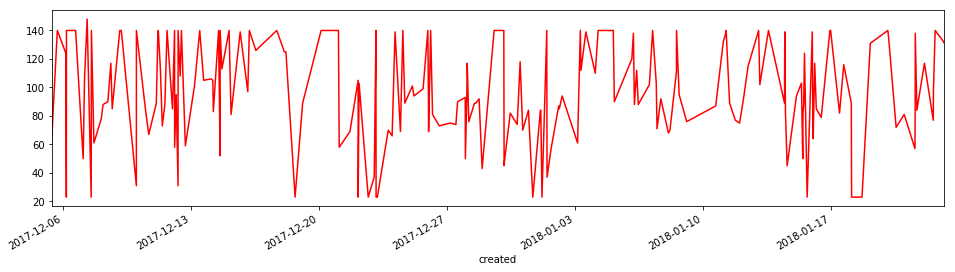

In [8]:
series_length = pd.Series(data=data['length'].values, index=data['created'])
series_likes  = pd.Series(data=data['no_likes'].values, index=data['created'])
series_retweets = pd.Series(data=data['no_retweets'].values, index=data['created'])

series_length.plot(figsize=(16,4), color='r')

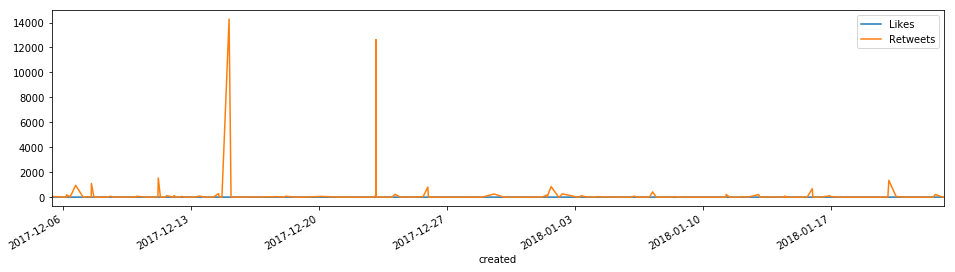

In [9]:
series_likes.plot(figsize=(16,4), label='Likes', legend=True)
series_retweets.plot(figsize=(16,4), label='Retweets', legend=True)

In [11]:
all_sources = []
for source in data['source']:
    all_sources.append(str(source))

all_sources = list(set(all_sources))    
print("Sources: {}".format(all_sources))


Sources: ['IFTTT', 'Buffer', 'dlvr.it', 'Crowdfire - Go Big', 'Twitter for Android', 'Twitter Web Client']


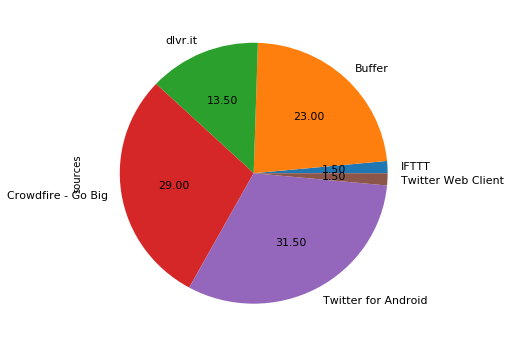

In [12]:
percent = np.zeros(len(all_sources))

for src in data['source']:
    percent[all_sources.index(src)] += 1

percent /= 100

pie_chart = pd.Series(percent, index=all_sources, name='sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6,6))

In [13]:
def analyse(tweet):
    analysis = TextBlob(tweet)
    return  1 if analysis.polarity > 0 else 0 if analysis.polarity == 0 else -1

data['sentiment'] = np.array([analyse(tweet) for tweet in data['Tweets']])

display(data.head(10))

,Tweets,length,id,created,source,no_likes,no_retweets,slug,sentiment
0,"""Just what we all wanted: super secret, super ...",131,955666497862586368,2018-01-23 05:00:23,Buffer,0,0,cdvel/status/955666497862586368,1
1,Where does all our training data derive from? ...,133,955635334963912704,2018-01-23 02:56:33,dlvr.it,0,0,cdvel/status/955635334963912704,-1
2,RT @jwangARK: TSMC — the world's largest chip ...,140,955485255695298561,2018-01-22 17:00:11,Buffer,0,219,cdvel/status/955485255695298561,0
3,Google CEO Sundar Pichai says AI is more profo...,98,955451257287831553,2018-01-22 14:45:05,Crowdfire - Go Big,0,0,cdvel/status/955451257287831553,1
4,WhatsApp launches a separate app for small bus...,77,955448031381475329,2018-01-22 14:32:16,Crowdfire - Go Big,0,0,cdvel/status/955448031381475329,-1
5,"LG has distributed its AI-based platform, Deep...",117,955272971609817088,2018-01-22 02:56:39,dlvr.it,0,0,cdvel/status/955272971609817088,-1
6,How to tame the tech titans - Competition in t...,84,955122950776283136,2018-01-21 17:00:31,Buffer,0,0,cdvel/status/955122950776283136,-1
7,Microsoft execs say in 20 years we'll all have...,138,955091407093542912,2018-01-21 14:55:10,Crowdfire - Go Big,1,0,cdvel/status/955091407093542912,0
8,Facebook's next news feed tweak: ranking 'trus...,82,955088894281830400,2018-01-21 14:45:11,Crowdfire - Go Big,1,0,cdvel/status/955088894281830400,0
9,Is video really the future of VR? https://t.co...,57,955085500251017217,2018-01-21 14:31:42,Crowdfire - Go Big,0,0,cdvel/status/955085500251017217,1


In [14]:
positives = [tweet for index, tweet in enumerate(data['Tweets']) if data['sentiment'][index] > 0]
neutral   = [tweet for index, tweet in enumerate(data['Tweets']) if data['sentiment'][index] == 0]
negatives = [tweet for index, tweet in enumerate(data['Tweets']) if data['sentiment'][index] < 0]

print("👍: {}, 👎: {}, 😐: {} ". format(len(positives), len(negatives), len(neutral)))

👍: 320, 👎: 140, 😐: 540 


### References 
- https://github.com/avisaxena33/Twitter-Data-Sentiment-Analysis-with-Python-Workshop/blob/master/twitter.py

### Notes
oauthlib, textblob for OSX64
- https://anaconda.org/asmeurer/oauthlib
- https://anaconda.org/sloria/textblob
    